
The data used is involves credit card fraud, with 31 variables. Target variable is Class, which indicates whether or not the transaction is fraudulent or not; it is also a highly imbalanced set. The feature set is primarily composed of principal components. The dataset and its metadata is publicly available on Kaggle, and can be accessed via the following link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

**ACKNOWLEDGEMENTS**

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Please cite the following works:

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi Reproducible machine Learning for Credit Card Fraud Detection - Practical Handbook

Bertrand Lebichot, Gianmarco Paldino, Wissam Siblini, Liyun He, Frederic Oblé, Gianluca Bontempi Incremental learning strategies for credit cards fraud detection, International Journal of Data Science and Analytics

# I. Loading necessary packages

In [1]:
# allows us to ignore warnings, since they are just warnings
import warnings
warnings.filterwarnings('ignore')

# allows us to print things in jupyter in a pretty way
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# import pandas to be able to use dataframes
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# import plotting library
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# allow inline plotting on notebook cells
%matplotlib inline
plt.switch_backend('agg')

# we'll get access to the numpy library
import numpy as np

# We'll use a label encoder to convert categorical feature to numerical values
from sklearn.preprocessing import LabelEncoder

# install using: pip install outlier_utils
# univariate anomaly detection
from outliers import smirnov_grubbs as grubbs

# Access to the localoutlierfactor for clustering
from sklearn.neighbors import LocalOutlierFactor

# allows us to implement a train test split strategy
from sklearn.model_selection import train_test_split

# access to the logistic regression class of Sklearn
from sklearn.linear_model import LogisticRegression

# access to the neural network model MLP Classifier
from sklearn.neural_network import MLPClassifier

# classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# for use with CAP report
from scipy import integrate

# feature power transformation functions
from scipy.stats import boxcox
from scipy.special import boxcox1p

# normality tests
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import probplot

# pip install imbalanced-learn (open anaconda prompt as admin)
# sudo pip install imbalanced-learn (macos/linux)
# pip install delayed (only do this if required)
# This module is used for handling imbalanced data
from imblearn.over_sampling import SMOTE

# Collections is a core python module. We wille use counter only for reporting
from collections import Counter




In [2]:
#!pip install outlier_utils

In [3]:
# allows us to ignore warnings, since they are just warnings
import warnings
warnings.filterwarnings('ignore')

# allows us to print things in jupyter in a pretty way
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# import pandas to be able to use dataframes
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# import plotting library
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# allow inline plotting on notebook cells
%matplotlib inline

# we'll get access to the numpy library
import numpy as np

# We'll use a label encoder to convert categorical feature to numerical values
from sklearn.preprocessing import LabelEncoder

# install using: pip install outlier_utils
# univariate anomaly detection
from outliers import smirnov_grubbs as grubbs

# Access to the localoutlierfactor for clustering
from sklearn.neighbors import LocalOutlierFactor

# allows us to implement a train test split strategy
from sklearn.model_selection import train_test_split

# access to the logistic regression class of Sklearn
from sklearn.linear_model import LogisticRegression

# access to the neural network model MLP Classifier
from sklearn.neural_network import MLPClassifier

# classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# feature power transformation functions
from scipy.stats import boxcox
from scipy.special import boxcox1p

# normality tests
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import probplot

# Data Visualization
import seaborn as sns

# II. Loading Data, Data Exploration, and Preparation


In [4]:
data_df = pd.read_csv(r"C:\Users\Bryan\Downloads\archive (2)\creditcard.csv")

In [5]:
data_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [6]:
# Do we have rows that have any null values?
#data_df.isnull().values.any()

# Query shows that there are no null values since nulls are encoded as -1. This will be fixed in subsequent code blocks.

In [7]:
# Let's have a quick view of the dataset
tmp_df = data_df.head(1).T
tmp_df.columns = ['sample']
tmp_df['dtypes'] = data_df.dtypes
tmp_df

,sample,dtypes
Time,0.000000,float64
V1,-1.359807,float64
V2,-0.072781,float64
V3,2.536347,float64
V4,1.378155,float64
V5,-0.338321,float64
V6,0.462388,float64
V7,0.239599,float64
V8,0.098698,float64
V9,0.363787,float64


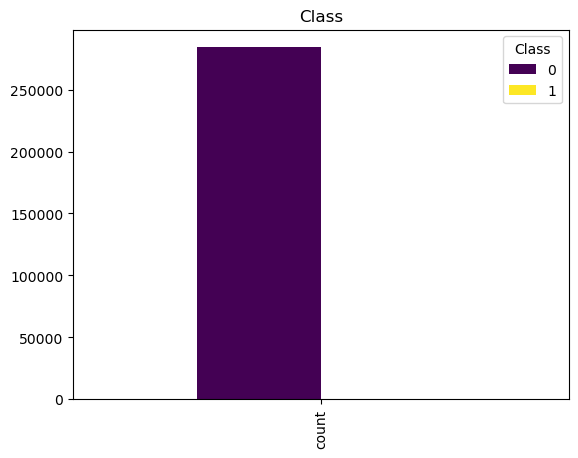

In [8]:
col = 'Class'
series = data_df[col]
tmp_df = pd.DataFrame(series.value_counts())
tmp_df = tmp_df.T


tmp_df.plot.bar(title=col,cmap="viridis")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [9]:
# There is a large imbalance between the two classes
display(tmp_df)

Class,0,1
count,284315,492


Let's try to better understand our data.

In [10]:
# Lets split the variables based on their types, whether they are discrete, continuous, or categorical variables.
df_num = data_df.select_dtypes(include=np.number) # Numeric
df_cat = data_df.select_dtypes(include=["object", "bool"]) # Categorical

In [11]:
# Summary Statistics for Numeric Data
df_num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.000000,94813.859575,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.000000,0.000000,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.000000,0.000000,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.000000,-0.000000,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.000000,0.000000,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.000000,0.000000,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.000000,0.000000,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.000000,-0.000000,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.000000,0.000000,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.000000,-0.000000,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


IndexError: index 10 is out of bounds for axis 0 with size 10

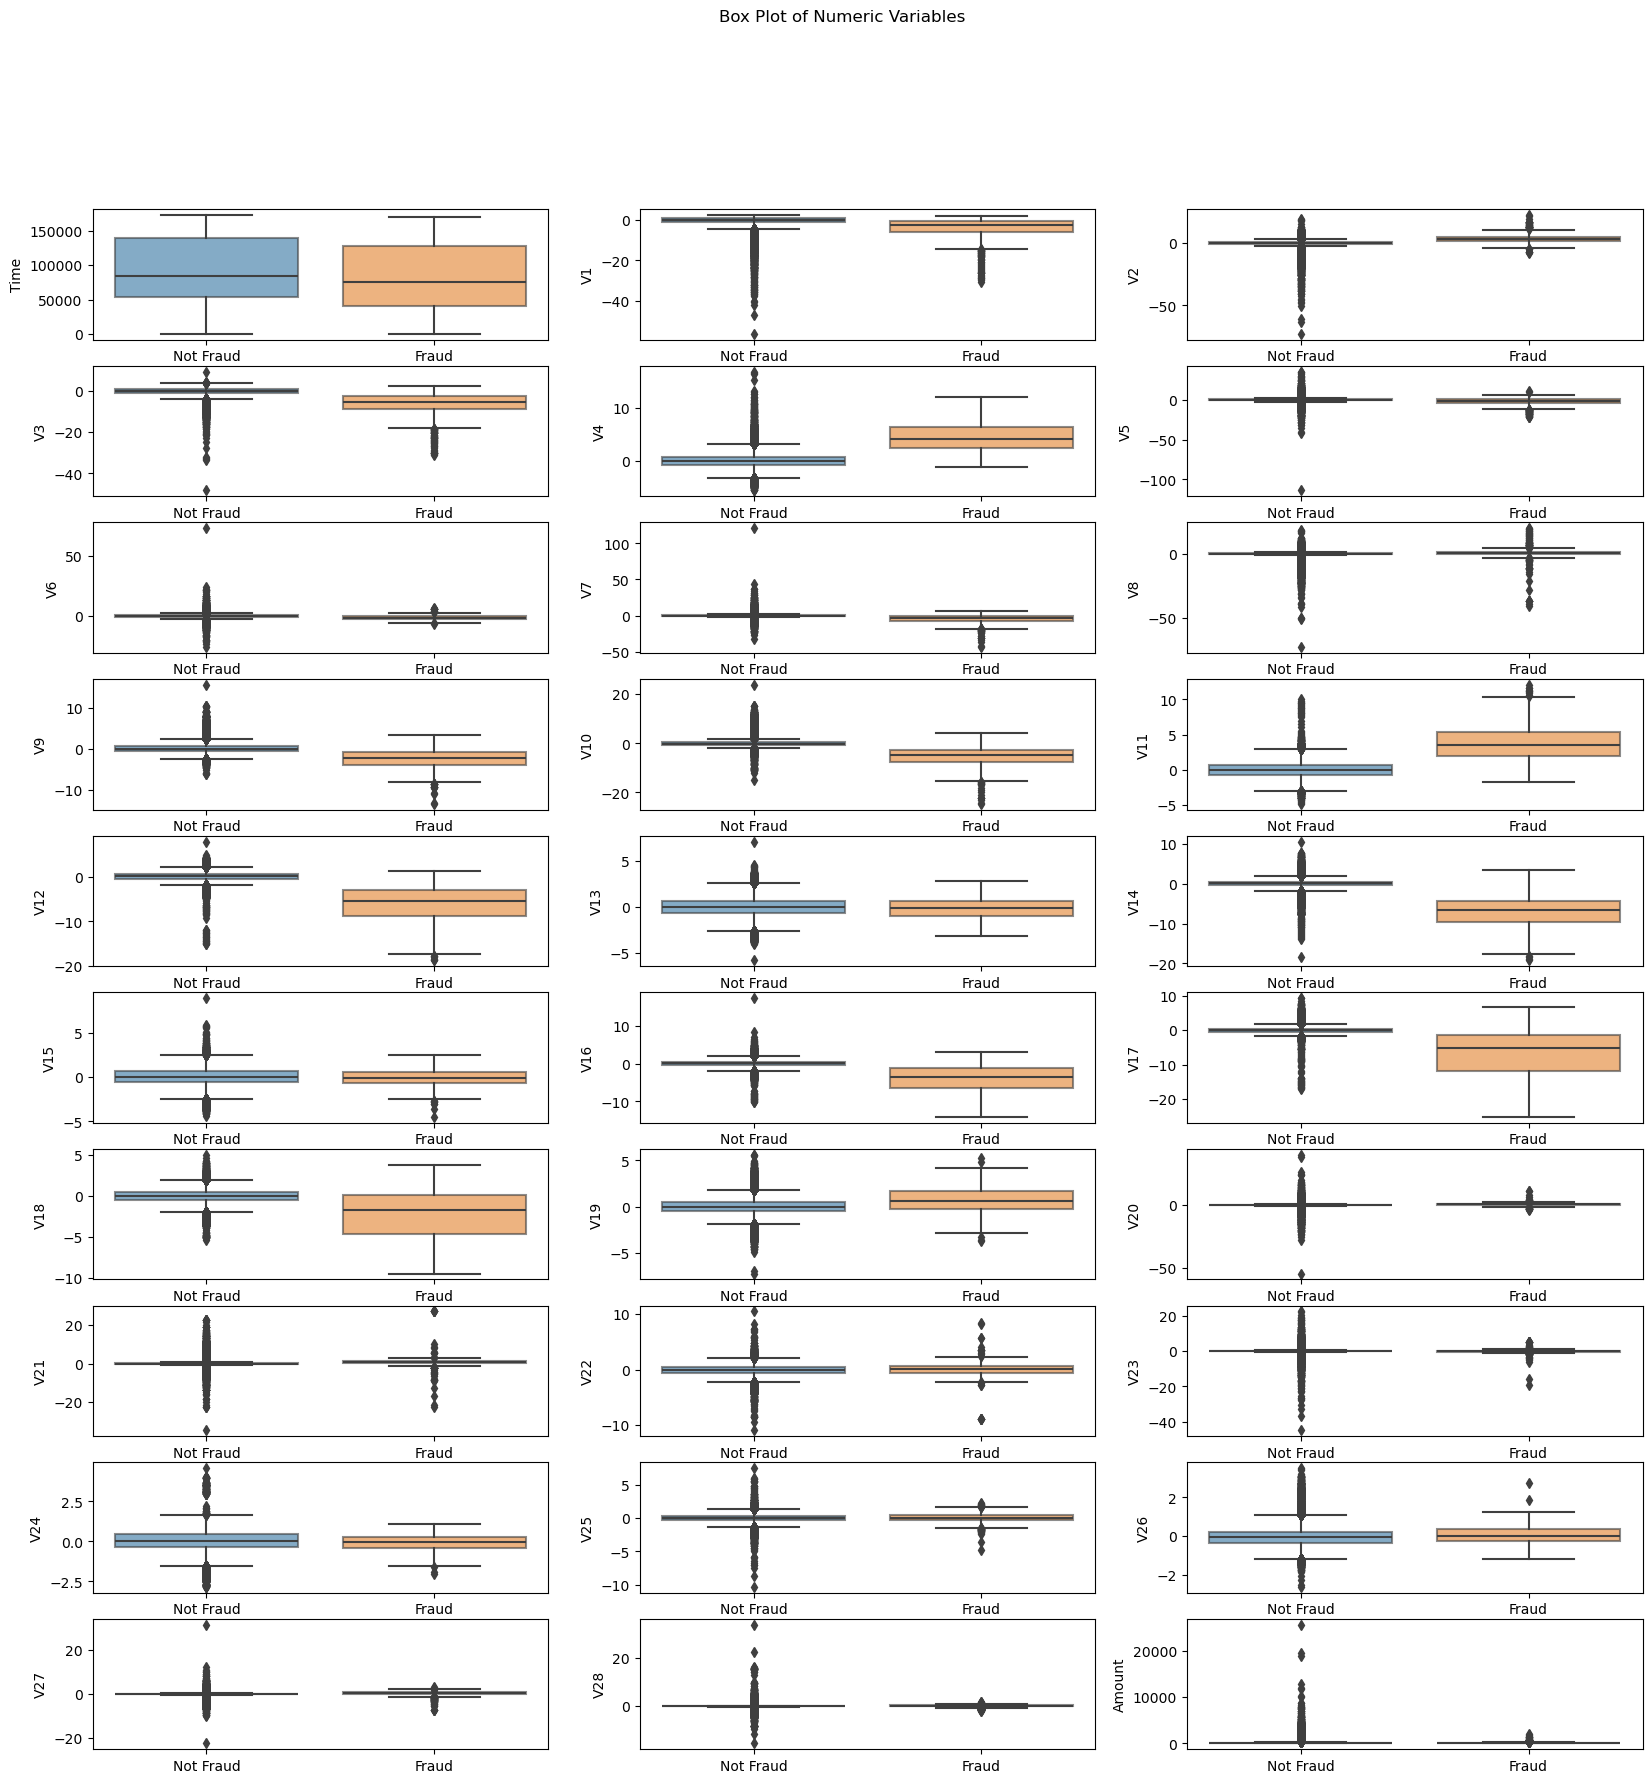

In [12]:
# Subplots
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(20, 20))
fig.suptitle('Box Plot of Numeric Variables')

# Loop
for i, feature in enumerate(data_df):
    ax = axes[i // 3][i % 3]
    sns.boxplot(data=data_df, x='Class', y=feature, ax=ax, boxprops=dict(alpha=.6))
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    ax.set_xticklabels(['Not Fraud', 'Fraud'])

plt.tight_layout()
plt.show()

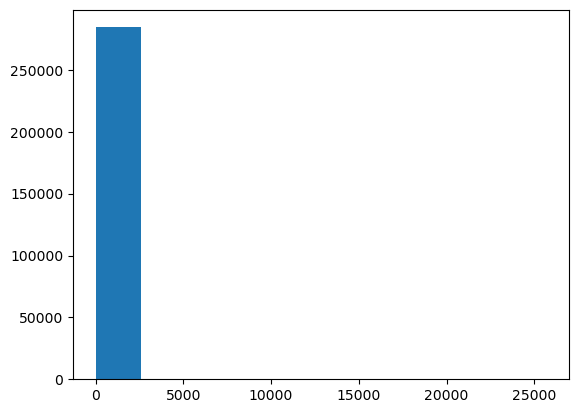

In [14]:
# Histogram - Amount
plt.hist(data_df['Amount'])
plt.show() 

## II.1 Data Preprocessing

In [15]:
data_df_features = data_df.drop("Class", axis=1)
data_df_features = data_df_features.drop("Time", axis=1)                              
data_df_target = data_df["Class"]

In [16]:
data_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.000000,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.770000,0
284803,172787.000000,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.790000,0
284804,172788.000000,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.880000,0
284805,172788.000000,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.000000,0


In [17]:
data_df_features

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.770000
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.790000
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.880000
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.000000


In [ ]:
data_df_target

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

## II.2 Train - Test Split

In [18]:
data_df_features = data_df_features.replace(np.NaN,0)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
...     data_df_features, data_df_target, test_size=0.3, random_state=42)

## II.3 Feature Selection

### II.3.A Checking Correlations

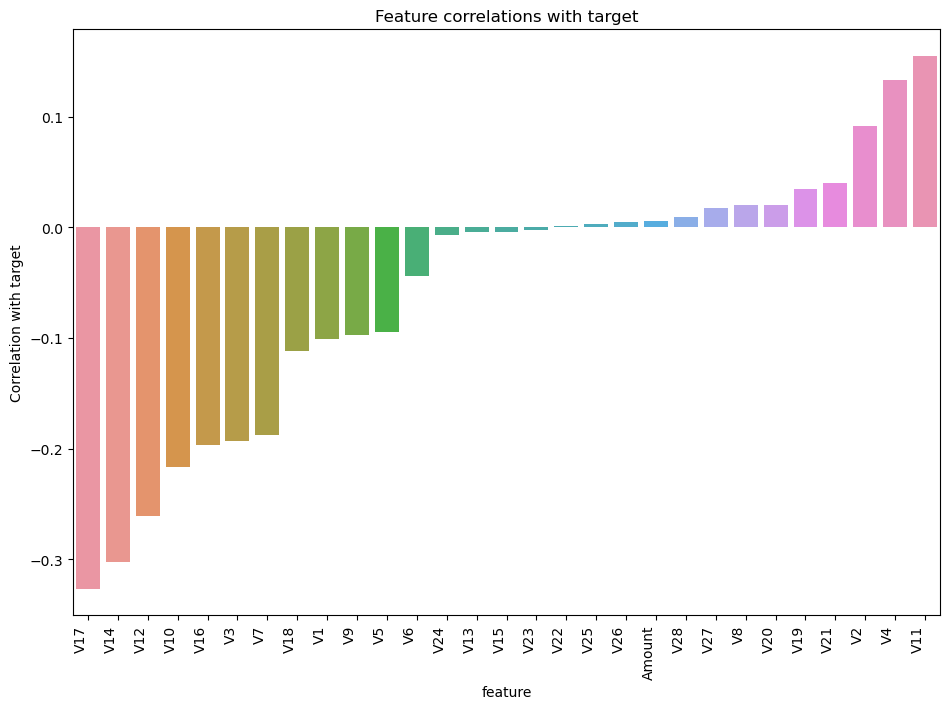

In [21]:
# Correlation coefficient between features and target

fig = plt.figure(figsize=(9.6,7.2))

corr_target = data_df_features.corrwith(data_df_target).reset_index()

corr_target.columns = ['feature','target_correlation']
corr_target = corr_target.sort_values(by='target_correlation')

ax = sns.barplot(data=corr_target,x='feature',y='target_correlation')
ax.set_title('Feature correlations with target')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_ylabel('Correlation with target')

fig.tight_layout()
plt.show()


# III. Anomaly Detection

In [22]:
%%time

lof_model = LocalOutlierFactor(n_neighbors=2)
y_pred = lof_model.fit_predict(X_train)


CPU times: total: 4min 51s
Wall time: 1min 5s


In [23]:
# Let's see how many outliers our unsupervised model detected (outliers are tagged as -1)

tmp_df = pd.DataFrame(y_pred)
tmp_df.value_counts()

 1    175450
-1     23914
Name: count, dtype: int64

In [24]:
lof_model.negative_outlier_factor_

array([-1.36118104e+00, -1.00007872e+00, -1.05126048e+00, ...,
       -1.00428714e+00, -8.71594367e+06, -1.13508950e+00])

# IV. Logistic Regression

In [1]:
# Base model using all variables
logreg_model = LogisticRegression(random_state=0)
columns = data_df_features.columns

# Let's input our training data set and fit our model
logreg_model.fit(X_train, y_train)

NameError: name 'LogisticRegression' is not defined

In [ ]:
importance = logreg_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d - %s, Score: %.6f' % (i,columns[i],v))

# plot feature importance
plt.bar([columns[x] for x in range(len(importance))], importance)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# predict against X_test
y_pred = logreg_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# Let's save our results in a variable for later use
y_pred_lr = y_pred

# How did our logistic regression perform?

print("accuracy: ",accuracy_score(y_test,y_pred_lr))
print("precision_score: ",precision_score(y_test,y_pred_lr))
print("recall_score: ",recall_score(y_test,y_pred_lr))
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_lr)

accuracy:  0.999204147794436
precision_score:  0.8333333333333334
recall_score:  0.625
confusion matrix: 


array([[85290,    17],
       [   51,    85]], dtype=int64)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.812


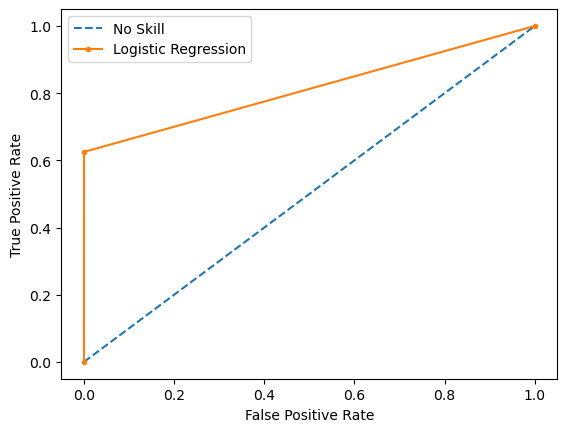

In [ ]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = y_pred_lr
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# V. Neural Network

In [ ]:
%%time 

# Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.
nn_model = MLPClassifier(random_state=0)

nn_model.fit(X_train, y_train)

CPU times: total: 29.9 s
Wall time: 31.9 s


MLPClassifier(random_state=0)

In [ ]:
# predict against X_test
y_pred = nn_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# Let's save our results in a variable for later use
y_pred_nn = y_pred

# How did our neural network model perform?

print("accuracy: ",accuracy_score(y_test,y_pred_nn))
print("precision_score: ",precision_score(y_test,y_pred_nn))
print("recall_score: ",recall_score(y_test,y_pred_nn))
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_nn)

accuracy:  0.9995318516437859
precision_score:  0.8870967741935484
recall_score:  0.8088235294117647
confusion matrix: 


array([[85293,    14],
       [   26,   110]], dtype=int64)

No Skill: ROC AUC=0.500
Neural Network: ROC AUC=0.904


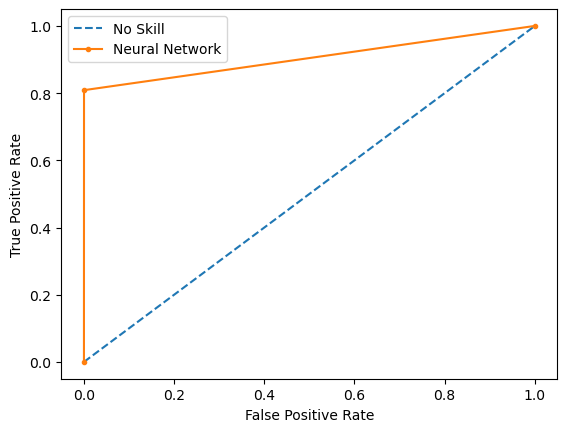

In [ ]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = y_pred_nn

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Neural Network: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Neural Network')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Due to the imbalanced nature of the dataset in terms of the fraud instances, SMOTE can be utilized to help the model performance.

# VI. SMOTE

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(data_df_features, data_df_target)

# summarize the new class distribution
counter = Counter(y)
print(counter)

In [ ]:
# Train-Test Split for SMOTE data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
...     X, y, test_size=0.3, random_state=42)

## VI.1. Logistic Regression

## VI.2. Neural Network